# Demo v2

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from tuple_weight_calculator import TupleWeightCalculator

max_iters = 10000
epsilon = 0.0001

tuple_weight_calculator = TupleWeightCalculator(convergence_metric='average')
weights = tuple_weight_calculator.get_weights(max_iters, epsilon)
weights

============= start iteration =============
Elapsed time: 0.1797 seconds
Saving checkpoint weights.npy to: [./checkpoints/5]
============= start iteration =============
Elapsed time: 0.2829 seconds
Saving checkpoint weights.npy to: [./checkpoints/5]
============= start iteration =============
iteration: 3 has reached diff to previous of: 0.02006!
Elapsed time: 0.2591 seconds
Saving checkpoint weights.npy to: [./checkpoints/5]
============= start iteration =============
iteration: 4 has reached diff to previous of: 0.01235!
Elapsed time: 0.1612 seconds
Saving checkpoint weights.npy to: [./checkpoints/5]
============= start iteration =============
iteration: 5 has reached diff to previous of: 0.00999!
Elapsed time: 0.2309 seconds
Saving checkpoint weights.npy to: [./checkpoints/5]
============= start iteration =============
iteration: 6 has reached diff to previous of: 0.00812!
Elapsed time: 0.2346 seconds
Saving checkpoint weights.npy to: [./checkpoints/5]
============= start iteration 

array([0.0011394 , 0.0011779 , 0.00099915, 0.0009909 , 0.00112381,
       0.00106377, 0.00061599, 0.00108944, 0.00116552, 0.00093682,
       0.00106973, 0.00109906, 0.00110365, 0.00110411, 0.00105919,
       0.00111694, 0.00089786, 0.00096157, 0.00116094, 0.00097761,
       0.00108302, 0.00068932, 0.00093178, 0.00103444, 0.00108119,
       0.00108302, 0.0007434 , 0.00088915, 0.00079611, 0.00060545,
       0.00119302, 0.00091986, 0.00082086, 0.00087586, 0.00091482,
       0.00104727, 0.00110731, 0.00107752, 0.00074432, 0.00104956,
       0.00061324, 0.00098219, 0.0011229 , 0.00067924, 0.00109952,
       0.0011009 , 0.00118569, 0.00068336, 0.00101657, 0.00110961,
       0.00102573, 0.00092673, 0.00096477, 0.00108944, 0.00108486,
       0.00100465, 0.00088915, 0.00077594, 0.00105965, 0.0009469 ,
       0.00075257, 0.00118065, 0.00103215, 0.00080665, 0.00109815,
       0.00108944, 0.00104269, 0.0010129 , 0.00115681, 0.00075119,
       0.00087586, 0.0009139 , 0.00112244, 0.0009854 , 0.00089

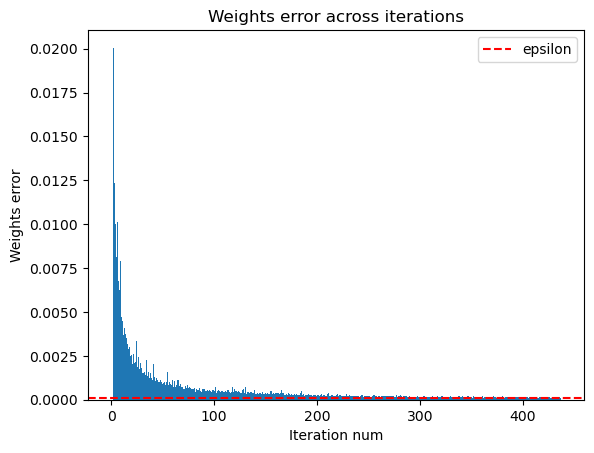

In [7]:
import matplotlib.pyplot as plt
from graphs_manager_v2 import GraphsManager
from tuple_weight_calculator import GRAPH_NAME

weightsErrorGraph = GraphsManager.get_graph(GRAPH_NAME)

plt.bar(weightsErrorGraph.get_x_axis(), weightsErrorGraph.get_y_axis(), 1.0)
plt.xlabel("Iteration num")
plt.ylabel("Weights error")
plt.title("Weights error across iterations")
plt.axhline(y=epsilon, color='r', linestyle='--', label='epsilon')
plt.legend()
plt.show()

In [8]:
from tuple_distance_calculator import TupleDistanceCalculator

tuple_distance_calculator = TupleDistanceCalculator()
dist_matrix = tuple_distance_calculator.calculate_distance_matrix()
dist_matrix

============= start iteration =============
Starting tuples with ids: (0,...,999) x (0,...,999)
Finished tuples with ids: (0,...,999) x (0,...,999)
Elapsed time: 7.0645 seconds
Saving checkpoint distance_matrix.npy to: [./checkpoints/5]
total time elapsed: 14.14607 seconds


array([[0.        , 0.4367599 , 0.45355706, ..., 0.43876847, 0.48539486,
        0.47708749],
       [0.4367599 , 0.        , 0.45169225, ..., 0.42265785, 0.47914486,
        0.46151231],
       [0.45355706, 0.45169225, 0.        , ..., 0.45346558, 0.46775743,
        0.44658276],
       ...,
       [0.43876847, 0.42265785, 0.45346558, ..., 0.        , 0.48448928,
        0.47498787],
       [0.48539486, 0.47914486, 0.46775743, ..., 0.48448928, 0.        ,
        0.45218615],
       [0.47708749, 0.46151231, 0.44658276, ..., 0.47498787, 0.45218615,
        0.        ]])